<a href="https://colab.research.google.com/github/vkumar61/MAT421/blob/main/ModuleC_Section_19_1_5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## What are roots?

Roots are simply the input values of a function when evaluated result in an output value of 0. From this broad definition we can pick up a few things: roots are unique to a particular function, not all functions have roots, and some functions can have multible roots. We continue the discussion here based on the lectures/notes, so we will assume same analytic form of the function is known and easy to visualze for checking purposes.

## Finding Roots

We have all seen the quadratic formula... but this only applies to polynomials of degree 2, and while you can find a general formula for polynomials of degree 3 and 4, at 5 an analytic method does not exist. This doesn't even consider non-polynomial functions. In general, if your function is not invertible, finding an analytic 0 is impossible. Thus, we resort to numerical methods, most commonly some iterative scheme. In general, you pick a number, see how far from 0 it is, and then move in a direction that gets you closer and closer to an output of 0. Then, when you hit a previously chosen cutoff value, you stop iterating. This cutoff value is known as tolerance.

## Understanding Roots

Roots denote the input values of a function that, upon evaluation, result in an output of 0. From this encompassing definition, we glean essential insights: roots are unique to a particular function, not all functions possess roots, and certain functions may exhibit multiple roots.

## Exploring Root Finding

In the realm of root finding, we often encounter the familiar quadratic formula for polynomials of degree 2, $x = \frac{-b \pm \sqrt{b^2 - 4ac}}{2a}$. However, as we delve into polynomials of higher degrees, specifically 3 and 4, general formulas exist. Beyond degree 4, though, an analytic method eludes us. This challenge extends to non-polynomial functions, particularly when a function is non-invertible, rendering the quest for an analytic zero impractical.

Consequently, we turn to numerical methods, often employing iterative schemes. The approach involves selecting an initial value, evaluating its distance from 0, and adjusting towards values that progressively approach an output of 0. The process concludes upon reaching a pre-established cutoff value known as tolerance.

## Tolerance

Tolerance acts as a threshold, determining when the iterative process stops. A smaller tolerance value implies greater precision, but it may require more iterations. Balancing precision and computational efficiency is crucial when implementing iterative schemes in the pursuit of accurate roots. When computing roots numerically, the goal is to find an $x_r$ such that $f(x_r)$ is very close to 0. A possible measure of error is $|f(x)|$, as its smaller value indicates proximity to a root. Additionally, assuming $x_i$ is the ith guess in an algorithm for finding a root, another viable choice for measuring error is $|x_{i+1} - x_i|$, representing the improvements between subsequent guesses. As the algorithm approaches a solution, we expect these improvements to diminish. For both of these metrics, we stop iterating when they decrease beyond the tolerance value. One can see how both of these metrics have their own flaws. If the function gets very close but does not touch 0, the magnitude metric is likely to fail. And similarly, if the function has two similar values across iterations, but far from 0, the consecutive difference is likely to fail. Thus, you have to be careful using either and cross-check any answers.

## Bisection Method

A very intuitive root finding method is known as the bisection method. It relies on finding two points that are on opposite sides of the x-axis, then finding the point directly in the middle, keeping one of the old points such that you still have points on opposite sides of the xaxis. Possible flaws in this method include having multiple roots between your initial points, leading to identification of the wrong root. It is also very inefficient. One major advantage is you are garunteed to find a root, even if it is not the right one.


## Newton-Raphson Method

The Newton-Raphson method, a powerful iterative technique for root finding, leverages the concept of linear approximation. Starting with an initial guess, the method refines the estimate by iteratively applying the formula:

$$x_{i+1} = x_i - \frac{f(x_i)}{f'(x_i)}$$

Here, $f(x)$ represents the function for which we seek a root, and $f'(x)$ denotes its derivative. The method essentially uses the tangent line at the current estimate to predict a more accurate root. While the Newton-Raphson method is highly efficient and converges rapidly for well-behaved functions, it may encounter challenges, such as divergence for certain functions or sensitivity to the initial guess. Another disadvantage is that you can not use it if you do not have a way to eavaluate your first derivative. One notable advantage is its efficiency in converging to the root, making it particularly valuable for functions with a single, well-defined root. However, caution is required as the method may not perform optimally in the presence of multiple roots or when the initial guess is far from a valid root.

Something interesting about Newton Raphson is that it comes from the 1st order Taylor approximation.

$$f(x) \approx f(x_0) + f'(x_0)(x - x_0)$$

Setting the first-order Taylor approximation equal to zero for the root-finding problem $f(x) = 0$ gives:

$$ 0 \approx f(x_0) + f'(x_0)(x - x_0) $$

Solving for $x$ results in the Newton-Raphson iteration formula:

$$x_{\text{new}} = x_{\text{old}} - \frac{f(x_{\text{old}})}{f'(x_{\text{old}})}$$

This iterative step forms the basis of the Newton-Raphson method.

This algorithm can actually be made more efficient with higher order Taylor approximations, but requires the ability to compute higher order derivatives.

We proceed to implement bisection and Newton-Raphson below, and compare:

In [1]:
def bisection_method(func, a, b, tol=1e-6, max_iter=100):
    if func(a) * func(b) > 0:
        raise ValueError("Initial points must surround a root.")

    iterations = 0
    while (b - a) / 2 > tol and iterations < max_iter:
        midpoint = (a + b) / 2
        if func(midpoint) == 0:
            return midpoint, iterations
        elif func(midpoint) * func(a) < 0:
            b = midpoint
        else:
            a = midpoint
        iterations += 1

    return (a + b) / 2, iterations

def newton_raphson_method(func, func_derivative, initial_guess, tol=1e-6, max_iter=100):
    x = initial_guess
    iterations = 0

    while abs(func(x)) > tol and iterations < max_iter:
        x = x - func(x) / func_derivative(x)
        iterations += 1

    return x, iterations


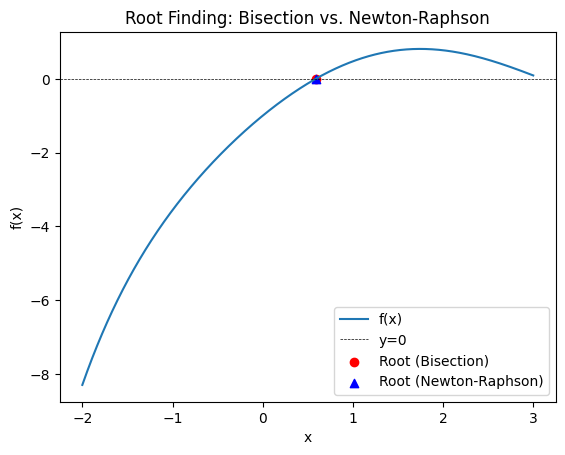

Bisection Method:
Root: 0.588532744004624
Iterations: 36

Newton-Raphson Method:
Root: 0.5885327439818541
Iterations: 14


In [15]:
import numpy as np
import matplotlib.pyplot as plt

# Function and its derivative
def func(x):
    return np.sin(x) - np.exp(-x)

def func_derivative(x):
    return np.cos(x) + np.exp(-x)

# Initial values for Bisection Method
a_bisection = -10
b_bisection = 2

# Initial guess for Newton-Raphson Method
initial_guess_newton = -10

# Tolerance
tolerance = 1e-10

# Applying Bisection Method
root_bisection, iterations_bisection = bisection_method(func, a_bisection, b_bisection, tol=tolerance)

# Applying Newton-Raphson Method
root_newton, iterations_newton = newton_raphson_method(func, func_derivative, initial_guess_newton, tol=tolerance)

# Generating x values for plotting
x_values = np.linspace(-2, 3, 1000)
y_values = func(x_values)

# Plotting the function
plt.plot(x_values, y_values, label='f(x)')
plt.axhline(0, color='black', linewidth=0.5, linestyle='--', label='y=0')

# Marking roots found by Bisection and Newton-Raphson with different colors and shapes
plt.scatter([root_bisection], [0], color='red', marker='o', label='Root (Bisection)')
plt.scatter([root_newton], [0], color='blue', marker='^', label='Root (Newton-Raphson)')

plt.title('Root Finding: Bisection vs. Newton-Raphson')
plt.xlabel('x')
plt.ylabel('f(x)')
plt.legend()
plt.show()

# Comparing convergence speeds
print("Bisection Method:")
print(f"Root: {root_bisection}")
print(f"Iterations: {iterations_bisection}")

print("\nNewton-Raphson Method:")
print(f"Root: {root_newton}")
print(f"Iterations: {iterations_newton}")

As mentioned above, both methods can fail/find incorrect roots if you are not not careful with cosing a good initial point:


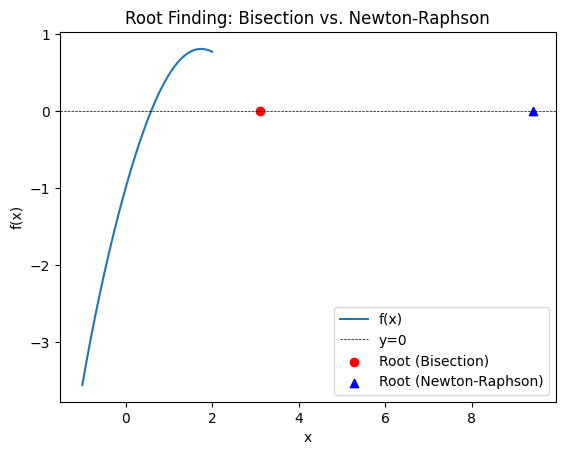

In [16]:
import numpy as np
import matplotlib.pyplot as plt

# Function and its derivative
def func(x):
    return np.sin(x) - np.exp(-x)

def func_derivative(x):
    return np.cos(x) + np.exp(-x)

# Initial values for Bisection Method
a_bisection = 1
b_bisection = 10

# Initial guess for Newton-Raphson Method
initial_guess_newton = 10

# Tolerance
tolerance = 1e-10

# Applying Bisection Method
root_bisection, iterations_bisection = bisection_method(func, a_bisection, b_bisection, tol=tolerance)

# Applying Newton-Raphson Method
root_newton, iterations_newton = newton_raphson_method(func, func_derivative, initial_guess_newton, tol=tolerance)

# Generating x values for plotting
x_values = np.linspace(-1, 2, 1000)
y_values = func(x_values)

# Plotting the function
plt.plot(x_values, y_values, label='f(x)')
plt.axhline(0, color='black', linewidth=0.5, linestyle='--', label='y=0')

# Marking roots found by Bisection and Newton-Raphson with different colors and shapes
plt.scatter([root_bisection], [0], color='red', marker='o', label='Root (Bisection)')
plt.scatter([root_newton], [0], color='blue', marker='^', label='Root (Newton-Raphson)')

plt.title('Root Finding: Bisection vs. Newton-Raphson')
plt.xlabel('x')
plt.ylabel('f(x)')
plt.legend()
plt.show()